<a href="https://colab.research.google.com/github/manasakoduri/DuPont-Analysis-Class-Activity/blob/main/ManasaK_DuPontAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

myAPIKey = '03bedf13ef53897de1454ac4df93b058'

stock = 'DIS'

balanceStatements = requests.get(f'https://financialmodelingprep.com/api/v3/balance-sheet-statement/{stock}?apikey={myAPIKey}').json()
incomeStatements = requests.get(f'https://financialmodelingprep.com/api/v3/income-statement/{stock}?apikey={myAPIKey}').json()



In [51]:
print (balanceStatements[:10])

[{'date': '2021-10-02', 'symbol': 'DIS', 'reportedCurrency': 'USD', 'cik': '0001744489', 'fillingDate': '2021-11-24', 'acceptedDate': '2021-11-24 16:34:25', 'calendarYear': '2021', 'period': 'FY', 'cashAndCashEquivalents': 15959000000, 'shortTermInvestments': 0.0, 'cashAndShortTermInvestments': 15959000000, 'netReceivables': 13367000000, 'inventory': 1331000000, 'otherCurrentAssets': 3000000000, 'totalCurrentAssets': 33657000000, 'propertyPlantEquipmentNet': 32624000000, 'goodwill': 78071000000, 'intangibleAssets': 17115000000, 'goodwillAndIntangibleAssets': 95186000000, 'longTermInvestments': 3935000000, 'taxAssets': 7246000000, 'otherNonCurrentAssets': 30961000000, 'totalNonCurrentAssets': 169952000000, 'otherAssets': 0.0, 'totalAssets': 203609000000, 'accountPayables': 16357000000, 'shortTermDebt': 5866000000, 'taxPayables': 0.0, 'deferredRevenue': 4317000000, 'otherCurrentLiabilities': 4537000000, 'totalCurrentLiabilities': 31077000000, 'longTermDebt': 51769000000, 'deferredRevenue

In [52]:
twoYearBalanceStatement = balanceStatements[:5]
twoYearIncomeStatement = incomeStatements[:5]

In [53]:
print (incomeStatements[:10])

[{'date': '2021-10-02', 'symbol': 'DIS', 'reportedCurrency': 'USD', 'cik': '0001744489', 'fillingDate': '2021-11-24', 'acceptedDate': '2021-11-24 16:34:25', 'calendarYear': '2021', 'period': 'FY', 'revenue': 67418000000, 'costOfRevenue': 45131000000, 'grossProfit': 22287000000, 'grossProfitRatio': 0.3305793704945267, 'researchAndDevelopmentExpenses': 0.0, 'generalAndAdministrativeExpenses': 0.0, 'sellingAndMarketingExpenses': 0.0, 'sellingGeneralAndAdministrativeExpenses': 13517000000, 'otherExpenses': 5111000000, 'operatingExpenses': 18628000000, 'costAndExpenses': 63759000000, 'interestIncome': 140000000, 'interestExpense': 1546000000, 'depreciationAndAmortization': 5111000000, 'ebitda': 8677000000, 'ebitdaratio': 0.12870450028182384, 'operatingIncome': 3659000000, 'operatingIncomeRatio': 0.05427333946423804, 'totalOtherIncomeExpensesNet': -1098000000, 'incomeBeforeTax': 2561000000, 'incomeBeforeTaxRatio': 0.03798688777477825, 'incomeTaxExpense': 25000000, 'netIncome': 1995000000, 'n

In [54]:
profitablity = []
assetTurnOver = []
capitalStructure = []
returnOnEquity = []

dates=[]

for i in range (0,5):
    dates.append(twoYearBalanceStatement[i]['date'])
    profitabilityValue=twoYearIncomeStatement[i]['netIncome']/twoYearIncomeStatement[i]['revenue']
    profitablity.append(profitabilityValue)
    assetTurnOverValue=twoYearIncomeStatement[i]['revenue']/twoYearBalanceStatement[i]['totalAssets']
    assetTurnOver.append(assetTurnOverValue)
    capitalStructureValue=twoYearBalanceStatement[i]['totalAssets']/twoYearBalanceStatement[i]['totalStockholdersEquity']
    capitalStructure.append(capitalStructureValue)
    returnOnEquityValue= profitabilityValue*assetTurnOverValue*capitalStructureValue
    returnOnEquity.append(returnOnEquityValue)



In [55]:
print(returnOnEquity)
print(dates)

[0.022528881009113187, -0.03426534103824941, 0.12437413504056168, 0.2582986488425973, 0.21735447174149825]
['2021-10-02', '2020-10-03', '2019-09-28', '2018-09-30', '2017-09-30']


In [56]:
DuPontAnalysisdf= pd.DataFrame(columns=['profitablity', 'assetTurnOver','capitalStructure','returnOnEquity','date'])

DuPontAnalysisdf['profitablity']=profitablity
DuPontAnalysisdf['assetTurnOver']=assetTurnOver
DuPontAnalysisdf['capitalStructure']=capitalStructure
DuPontAnalysisdf['returnOnEquity']=returnOnEquity
DuPontAnalysisdf['date']=dates


In [57]:
print(DuPontAnalysisdf)

   profitablity  assetTurnOver  capitalStructure  returnOnEquity        date
0      0.029592       0.331115          2.299290        0.022529  2021-10-02
1     -0.043800       0.324427          2.411364       -0.034265  2020-10-03
2      0.158890       0.358638          2.182612        0.124374  2019-09-28
3      0.211966       0.602791          2.021569        0.258299  2018-09-30
4      0.162867       0.575609          2.318504        0.217354  2017-09-30


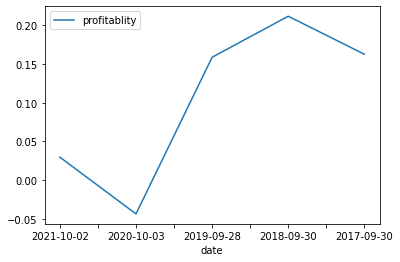

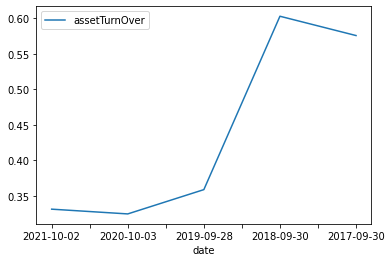

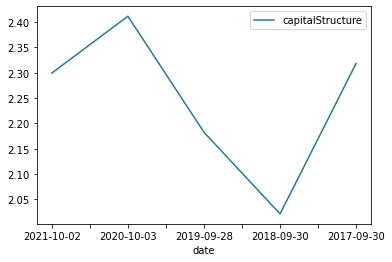

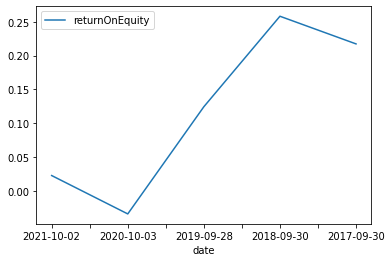

In [62]:
DuPontAnalysisdf.plot(x ='date', y ='profitablity1', kind = 'line')


DuPontAnalysisdf.plot(x ='date', y ='assetTurnOver', kind = 'line')


DuPontAnalysisdf.plot(x ='date', y ='capitalStructure', kind = 'line')


DuPontAnalysisdf.plot(x ='date', y ='returnOnEquity', kind = 'line')


plt.show()

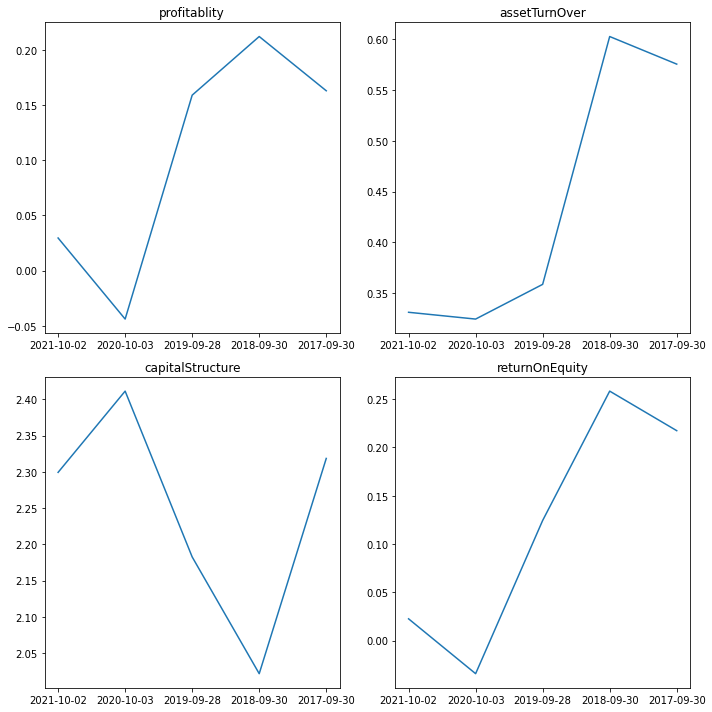

In [68]:
fig, axs=plt.subplots(2,2,figsize=(10,10))

x=DuPontAnalysisdf['date']

values=['profitablity', 'assetTurnOver','capitalStructure','returnOnEquity']

for i in range(0,2):
  for j in range(0,2):
    valueIndex=i*2+j
    axs[i,j].plot(x,DuPontAnalysisdf[values[valueIndex]])
    axs[i,j].set_title(values[valueIndex])
    fig.tight_layout()
